In [3]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

2025-11-08 12:37:20.343943: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

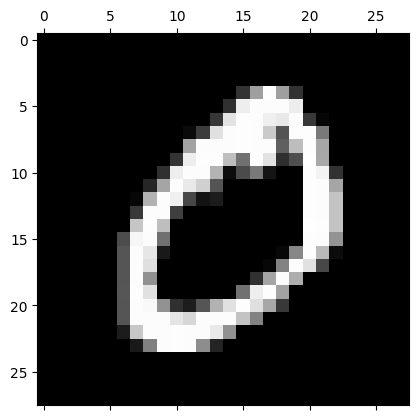

In [5]:
plt.matshow(x_train[1], cmap='gray')

In [ ]:
# Normalize (Scale) the data to get better accuracy and valuess between 0 and 1
x_train = x_train / 255.0
x_test = x_test / 255.0 

In [ ]:
# Flatten the 28x28 images into 784 element vectors
x_train_flattened = x_train.reshape(len(x_train), 28*28)
x_test_flattened = x_test.reshape(len(x_test), 28*28)

In [8]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
# Create the neural network model
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')])
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# Train the model
model.fit(x_train_flattened, y_train, epochs=5)

/Users/aditibaranidar/.pyenv/versions/3.12.7/lib/python3.12/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8778 - loss: 0.4671
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9156 - loss: 0.3038
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9210 - loss: 0.2833
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9241 - loss: 0.2732
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9258 - loss: 0.2663


In [ ]:
# Evaluate the model
model.evaluate(x_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9273 - loss: 0.2634


[0.263445109128952, 0.927299976348877]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


1

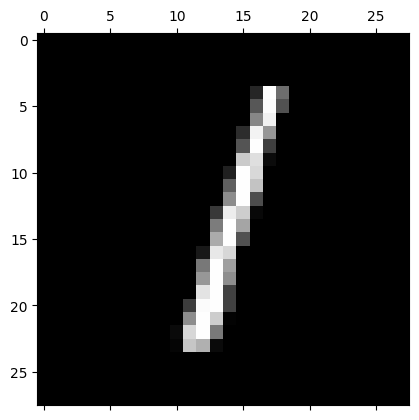

In [ ]:
# Make predictions
y_predicted = model.predict(x_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
plt.matshow(x_test[2], cmap='gray')
y_predicted_labels[2]

In [11]:
# Create the confusion matrix
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 964,    0,    2,    2,    0,    4,    5,    2,    1,    0],
       [   0, 1114,    3,    2,    0,    1,    4,    2,    9,    0],
       [   6,    9,  930,   16,    6,    4,   11,    9,   37,    4],
       [   3,    0,   21,  909,    0,   31,    2,   13,   25,    6],
       [   2,    1,    7,    2,  910,    0,    8,    4,   12,   36],
       [  10,    2,    3,   22,    9,  787,   12,    7,   34,    6],
       [  13,    3,    7,    1,    7,   14,  908,    2,    3,    0],
       [   1,    6,   24,    7,    4,    1,    0,  958,    4,   23],
       [   7,    8,    7,   16,    9,   19,    7,   12,  885,    4],
       [  11,    7,    1,   10,   25,    7,    0,   27,    9,  912]],
      dtype=int32)>

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached pandas-2.3.3-cp312-cp312-macosx_10_13_x86_64.whl.metadata (91 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached pandas-2.3.3-cp312-cp312-macosx_10_13_x86_64.whl (11.6 MB)
Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
Using cached tzdata-2025.2-py2.py3-none-any.whl (347 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [seaborn]m3/4 [seaborn]
Note: you may need to restart the kernel to use updated packages.


Text(95.72222222222221, 0.5, 'Truth')

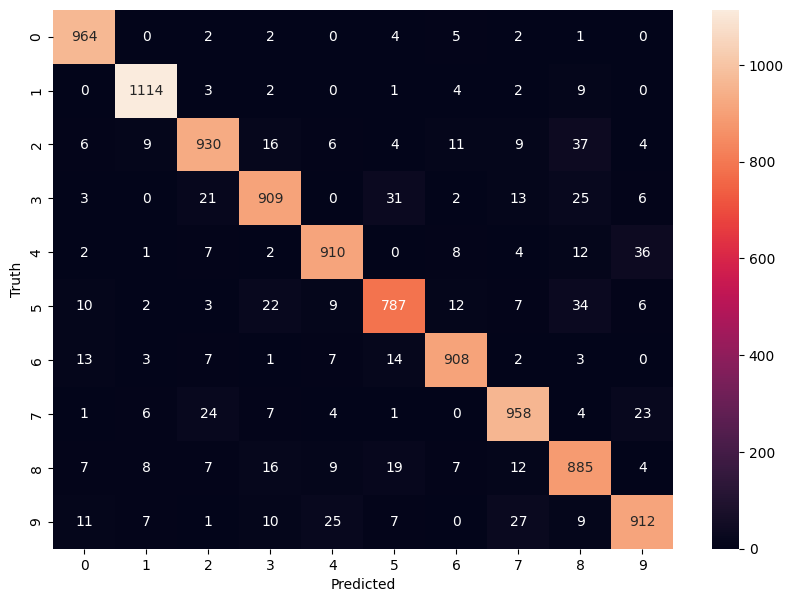

In [ ]:
# Visualize the confusion matrix
# install seaborn if it's missing
%pip install seaborn
import seaborn as sn
plt.figure(figsize = (10,7))
# cm is a TensorFlow EagerTensor; convert to numpy for plotting
sn.heatmap(cm.numpy() if hasattr(cm, "numpy") else cm, annot=True, fmt='d') 
plt.xlabel('Predicted')
plt.ylabel('Truth') 

In [14]:
# Let's add more hidden layers to improve accuracy
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')])
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# Train the model
model.fit(x_train_flattened, y_train, epochs=5)

/Users/aditibaranidar/.pyenv/versions/3.12.7/lib/python3.12/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9184 - loss: 0.2888
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9619 - loss: 0.1313
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9726 - loss: 0.0906
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9798 - loss: 0.0684
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9840 - loss: 0.0532


In [15]:
# Evaluate the model
model.evaluate(x_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9733 - loss: 0.0805


[0.08054360002279282, 0.9732999801635742]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


1

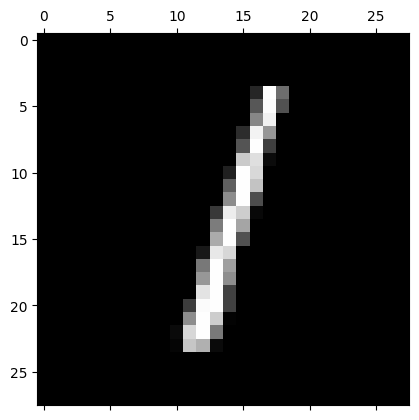

In [16]:
# Make predictions
y_predicted = model.predict(x_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
plt.matshow(x_test[2], cmap='gray')
y_predicted_labels[2]

In [17]:
# Create the confusion matrix
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 963,    0,    1,    1,    3,    2,    4,    1,    3,    2],
       [   0, 1126,    1,    1,    0,    0,    2,    0,    5,    0],
       [   3,    8,  989,    9,    4,    0,    4,    8,    7,    0],
       [   0,    0,    2,  989,    0,   13,    0,    3,    2,    1],
       [   0,    1,    4,    1,  960,    1,    3,    2,    2,    8],
       [   2,    0,    0,    6,    2,  869,    6,    1,    5,    1],
       [   3,    3,    1,    1,    4,    3,  936,    0,    7,    0],
       [   1,    6,    8,    7,    1,    0,    0, 1000,    3,    2],
       [   2,    0,    1,    5,    4,    2,    4,    1,  954,    1],
       [   1,    3,    0,   11,   15,    7,    1,   13,   11,  947]],
      dtype=int32)>

Note: you may need to restart the kernel to use updated packages.


Text(95.72222222222221, 0.5, 'Truth')

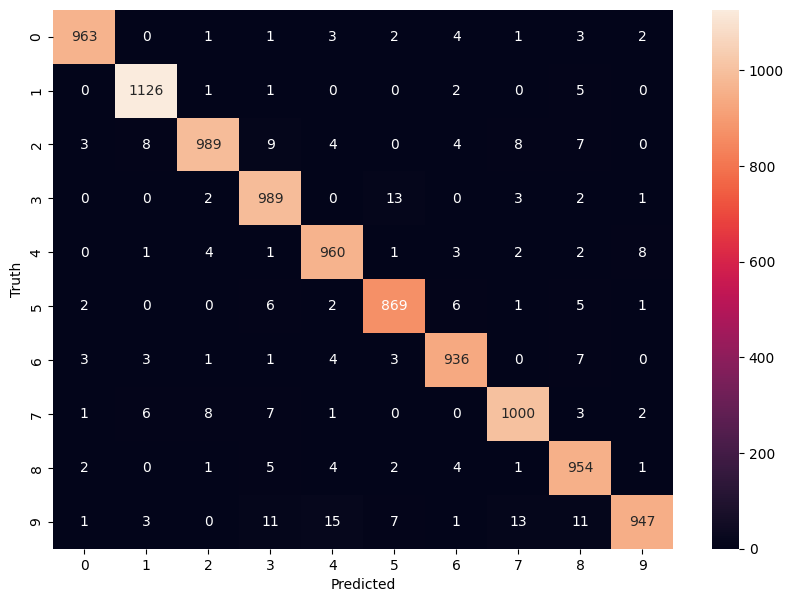

In [18]:
# Visualize the confusion matrix
# install seaborn if it's missing
%pip install seaborn
import seaborn as sn
plt.figure(figsize = (10,7))
# cm is a TensorFlow EagerTensor; convert to numpy for plotting
sn.heatmap(cm.numpy() if hasattr(cm, "numpy") else cm, annot=True, fmt='d') 
plt.xlabel('Predicted')
plt.ylabel('Truth') 

In [19]:
#Create the neural network without flattening the images
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')])
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# Train the model
model.fit(x_train, y_train, epochs=5)

/Users/aditibaranidar/.pyenv/versions/3.12.7/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.9246 - loss: 0.2658
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9643 - loss: 0.1200
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9739 - loss: 0.0843
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9802 - loss: 0.0642
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9844 - loss: 0.0506
